<a href="https://colab.research.google.com/github/kumarluvkl/winequality-/blob/main/TTL_lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
df=pd.read_csv('/winequality-red.csv - winequality-red.csv.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
import tensorflow as tf

In [ ]:
train_df=df.sample(frac=0.75,random_state=4)
val_df=df.drop(train_df.index)

In [ ]:
max_val= train_df.max(axis=0)
min_val=train_df.min(axis=0)
range= max_val-min_val
train_df=(train_df-min_val)/range
val_df=(val_df-min_val)/range


In [ ]:
X_train=train_df.drop('quality',axis=1)
X_val=val_df.drop('quality',axis=1)
Y_train=train_df['quality']
Y_val=val_df['quality']
input_shape=[X_train.shape[1]]
input_shape

[11]

In [ ]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64,activation ='relu',input_shape = input_shape),
    tf.keras.layers.Dense(units = 32,activation ='relu'),
    tf.keras.layers.Dense(units = 1)
                            ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mae')

In [ ]:
losses = model.fit(X_train,Y_train,validation_data=(X_val,Y_val),batch_size = 100,epochs=15)


Epoch 1/15
12/12 [==============================] - 2s 33ms/step - loss: 0.3542 - val_loss: 0.1764
Epoch 2/15
12/12 [==============================] - 0s 7ms/step - loss: 0.1431 - val_loss: 0.1379
Epoch 3/15
12/12 [==============================] - 0s 9ms/step - loss: 0.1251 - val_loss: 0.1143
Epoch 4/15
12/12 [==============================] - 0s 10ms/step - loss: 0.1142 - val_loss: 0.1082
Epoch 5/15
12/12 [==============================] - 0s 9ms/step - loss: 0.1086 - val_loss: 0.1060
Epoch 6/15
12/12 [==============================] - 0s 9ms/step - loss: 0.1065 - val_loss: 0.1045
Epoch 7/15
12/12 [==============================] - 0s 7ms/step - loss: 0.1046 - val_loss: 0.1035
Epoch 8/15
12/12 [==============================] - 0s 8ms/step - loss: 0.1033 - val_loss: 0.1028
Epoch 9/15
12/12 [==============================] - 0s 6ms/step - loss: 0.1024 - val_loss: 0.1017
Epoch 10/15
12/12 [==============================] - 0s 6ms/step - loss: 0.1017 - val_loss: 0.1017
Epoch 11/15
12/12

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_val.iloc[121:124,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
540,0.407080,0.321918,0.303797,0.165517,0.148581,0.267606,0.144876,0.640969,0.347826,0.206061,0.184615
543,0.584071,0.369863,0.303797,0.110345,0.121870,0.211268,0.166078,0.677680,0.173913,0.236364,0.400000
548,0.690265,0.157534,0.620253,0.117241,0.111853,0.366197,0.222615,0.685022,0.226087,0.254545,0.307692


In [ ]:
Y_val[121:124]

540    0.4
543    0.6
548    0.6
Name: quality, dtype: float64

In [ ]:
test = X_val.iloc[120]
test.shape
new_test = pd.DataFrame(test.values.reshape(1,-1))

In [ ]:
model.predict(new_test)

1/1 [==============================] - 0s 124ms/step


array([[0.7674924]], dtype=float32)

In [ ]:
Y_train.iloc[120]

0.8

In [ ]:
X_val.iloc[200:210]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
842,0.530973,0.260274,0.569620,0.117241,0.178631,0.464789,0.219081,0.514684,0.321739,0.236364,0.384615
843,0.221239,0.386986,0.443038,0.075862,0.126878,0.112676,0.303887,0.457416,0.365217,0.175758,0.153846
844,0.469027,0.089041,0.582278,0.055172,0.083472,0.352113,0.127208,0.428047,0.278261,0.303030,0.338462
845,0.159292,0.356164,0.265823,0.062069,0.115192,0.183099,0.088339,0.500734,0.634783,0.200000,0.215385
847,0.247788,0.383562,0.202532,0.062069,0.110184,0.154930,0.116608,0.560206,0.556522,0.224242,0.230769
851,0.415929,0.212329,0.556962,0.068966,0.121870,0.112676,0.056537,0.514684,0.365217,0.133333,0.169231
856,0.415929,0.164384,0.493671,0.041379,0.113523,0.563380,0.173145,0.473568,0.530435,0.242424,0.384615
865,0.230088,0.352740,0.088608,0.117241,0.108514,0.211268,0.282686,0.544053,0.565217,0.127273,0.200000
870,0.274336,0.407534,0.012658,0.082759,0.086811,0.422535,0.130742,0.267254,0.478261,0.145455,0.523077
876,0.221239,0.239726,0.000000,0.089655,0.091820,0.084507,0.028269,0.374449,0.469565,0.151515,0.384615


In [ ]:
Y_val.iloc[200:210]

842    0.6
843    0.4
844    0.6
845    0.4
847    0.6
851    0.4
856    0.6
865    0.4
870    0.6
876    0.2
Name: quality, dtype: float64

In [ ]:
model.predict(X_val.iloc[200:210,:])

1/1 [==============================] - 0s 25ms/step


array([[0.58982784],
       [0.36807847],
       [0.6122716 ],
       [0.45503998],
       [0.47556752],
       [0.43676332],
       [0.6121688 ],
       [0.43120527],
       [0.6107048 ],
       [0.5363634 ]], dtype=float32)

In [ ]:
loss_df = pd.DataFrame(losses.history)
loss_df

,loss,val_loss
0,0.354186,0.176413
1,0.143051,0.137936
2,0.125078,0.114290
3,0.114224,0.108197
4,0.108617,0.106000
5,0.106486,0.104548
6,0.104615,0.103463
7,0.103279,0.102752
8,0.102367,0.101714
9,0.101660,0.101708


<Axes: >

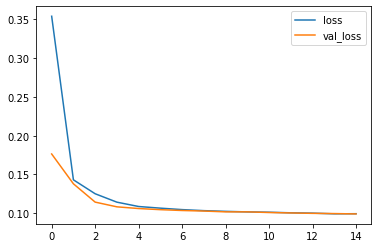

In [ ]:
loss_df.loc[:,['loss','val_loss']].plot()

In [ ]:
def sigmoid(loss):
    return 1.0/(1.0 + np.exp(-loss))
    

In [ ]:
print(sigmoid(0.5))

0.6224593312018546


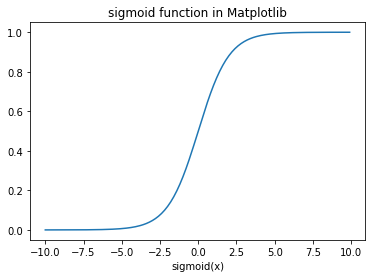

In [ ]:
import matplotlib.pyplot as plt
def sigmoid(loss):
  return 1.0/(1.0 + np.exp(-loss))

values= np.arange(-10,10,0.1)

plt.plot(values,sigmoid(values))
plt.xlabel('x')
plt.xlabel('sigmoid(x)')
plt.title('sigmoid function in Matplotlib')
plt.show()

# New Section